<h1>Quantum Computing</h1>

<h3>What is Quantum Computing?</h3>

Quantum Computing is an emerging technology which uses quantum mechanics to perform computations, as a conventional computer uses bits which can be 0 or 1, Quantum computing uses qubits which can be in superposition meaning both 0 or 1 at the same time. This creates a new dimension which our classical computers do not have and creates opportunity to do much larger scale computations.

<b>Qubit Analogy</b> - A qubit can be represented as a spinning coin, The coin is both heads and tails at the same time, Just like how a qubit can be 0 or 1 at the same time.

<b>Superposition Analogy</b> - The Superposition is the state for the spinning coin which is heads and tails at the same time.


<h2>Key Concepts in Quantum Computing:</h2>

<h3>Quantum Gates</h3>

Just like classical computing uses logic gates to process information, quantum computing uses quantum gates to perform similar functions but with operations that exploit the unique properties of quantum physics. These quantum gates are the building blocks of quantum circuits, changing the states of qubits in ways that enable superposition where a qubit can be in multiple states at once and entanglement where the state of one qubit can depend on the state of another no matter the distance between them. This enables quantum computers to perform many calculations simultaneously, offering the potential for vast computational speed-ups for certain tasks. Quantum gates operate through various physical phenomena, such as the polarization of photons or the spin of electrons, and are crucial for the manipulation of quantum information in algorithms designed for quantum processors. I will explain a few gates which are vital to Duetsch's Algorithm Specifcally.
<a href="https://quantumzeitgeist.com/quantum-computing-101/">[1]. Quantum 101</a>


<h4 class="text-center" >Hadamard Gate (H Gate)</h4>

The Hadamard gate is used for creating superpositions. It is a
single-qubit gate that transforms the standard basis states |0⟩ and |1⟩ into equal
superpositions of the two states, effectively "mixing" them together. <a href="https://www.sciencedirect.com/topics/mathematics/hadamard-gate">[5]. Hadamard Gate</a>

$$
H = \frac{1}{\sqrt{2}}\begin{pmatrix}1&1\\ 1&-1\end{pmatrix}
$$

<h4 class="text-center" >Controlled-NOT Gate (CNOT Gate):</h4>

It's a fundamental gate for creating and manipulating entanglements and conditional operations in quantum circuits. It is a two qubit operation where the first quibit is called the control qubit and the second is called the target qubit. This gate is used by leaving the first qubit unchanged and then performing a Pauli-X gate on the target qubit when the control qubit is in state ∣1⟩ and leaving the target qubit unchanged when the control qubit is ∣0⟩.
<a href="https://www.quantum-inspire.com/kbase/cnot/">[6]. CNOT Gate</a>

\begin{pmatrix}
1 & 0 & 0 & 0 \\
0 & 1 & 0 & 0 \\
0 & 0 & 0 & 1 \\
0 & 0 & 1 & 0
\end{pmatrix}


<h3>Quantum Circuits</h3>

A Quantum Circuit is a computational procedure with real-time classical computation that uses quantum operations and data such as qubits. It consists of quantum gates, measurements, resets, which make up a sequence of operations guiding the behavior of qubits through a computational task. These operations allow the circuit to exploit quantum phenomena such as superposition and entanglement to perform complex calculations more efficiently than classical circuits. The output of a quantum circuit is typically obtained by measuring the qubits at the end of the process, which provides the result of the quantum computation in the form of classical bits<a href="https://quantumzeitgeist.com/quantum-computing-101/">[1]. Quantum 101</a>


<h3>Quantum Entanglement</h3>

Quantum entanglement is a phenomenon where a group of particles become interconnected in such a way that the state of each particle cannot be described independently of the state of the others, even when the particles are separated by large distances. This means that measuring one entangled particle immediately affects the state of the other no matter how far apart they are.<a href="https://quantumzeitgeist.com/quantum-computing-101/">[1]. Quantum 101</a>


<h2>Deterministic vs Probabilistic Algorithms in Quantum Computing</h2>

<b>Deterministic Algorithms:</b>
are those that always produce the same output for a given input. The outcome is predictable and repeatable.


<b>Probabilistic Algorithms:</b>
in contrast, may produce different outputs for the same input upon different runs. They are inherently based on probability and often give the correct answer with a certain likelihood less than 100%.

Deutsch's Algorithm is a deterministic quantum algorithm. It correctly determines whether a given function is constant or balanced in just one query. This deterministic property shows that for the specific problem of determining the nature of a binary function, a quantum computer can outperform classical computers in efficiency and speed, even though the problem itself is relatively simple. 


 <h1>Deutsch’s Algorithm</h1>

<h3>What is Deutsch’s Algorithm?</h3>

Deutsch’s Algorithm is a quantum algorithm which can determine if a Boolean function is constant (Always the same) or balanced (Changes Sometimes) using only one query. This contrasts with classical algorithms, which require multiple queries.

- Boolean Function: Is a function which takes one or more binary inputs (0's and 1's) then functions and produces a single binary.

A constant function is one that always outputs the same value.
A balanced function is one that outputs 0 half of the time and 1 half of the time.



<h2>Problem Statement</h2>

$f: \{0, 1\}^n \to \{0, 1\}$

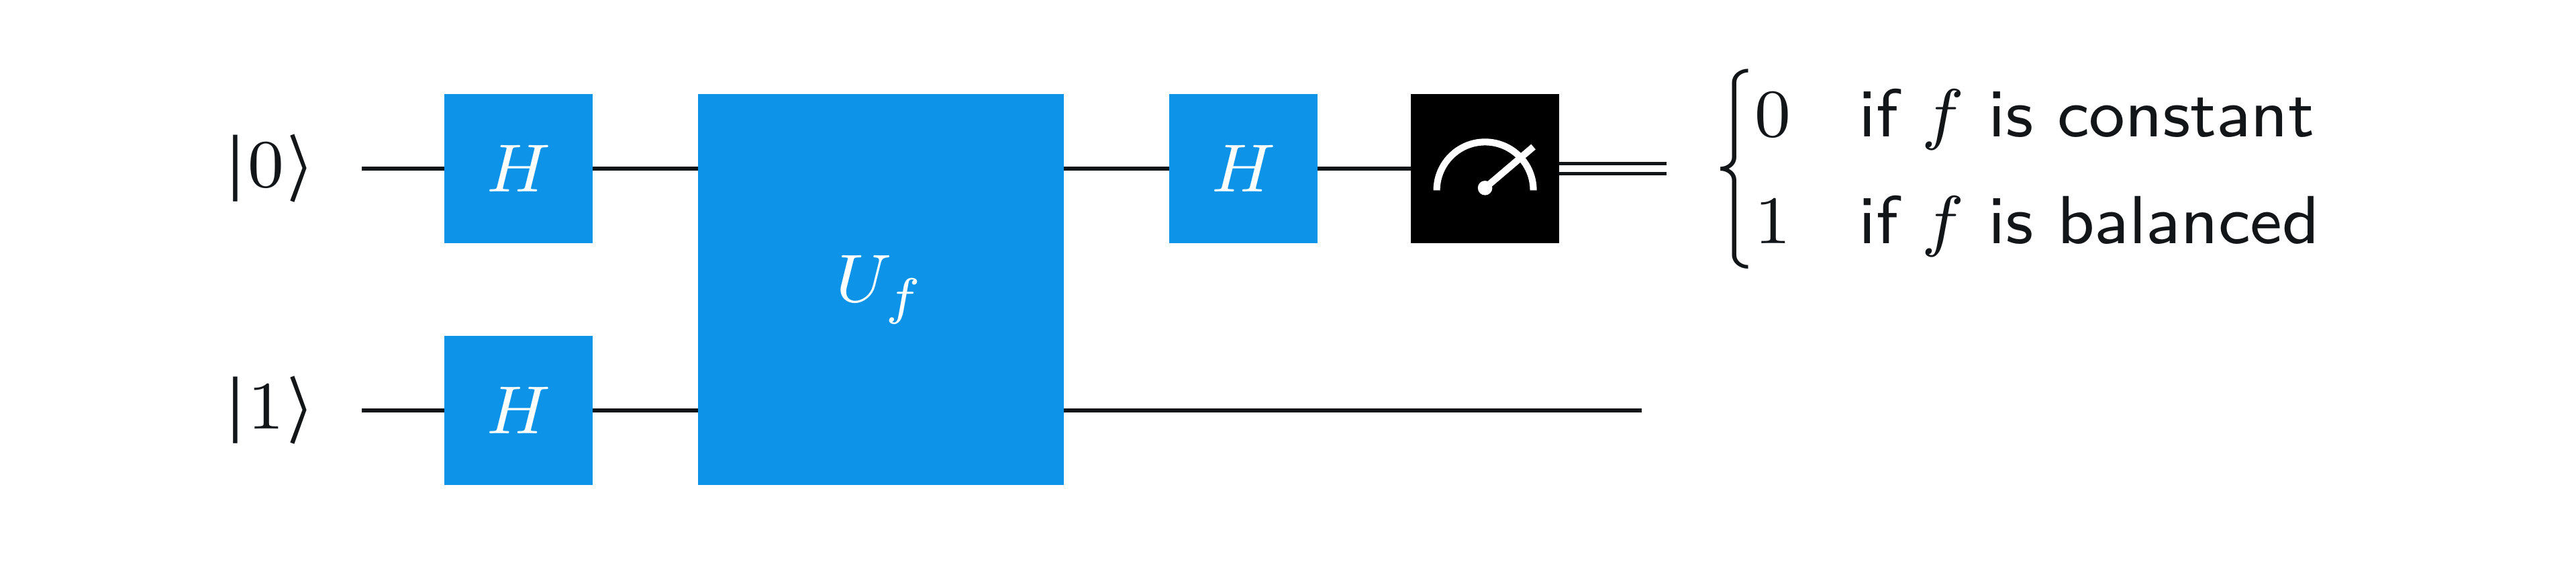

Given a black box function f: {0, 1} → {0, 1}, determine whether f is a constant function or a balanced function. An oracle acts as a black box function

Deutsch's algorithm can solve this problem with only one query to the black box function. This is a significant improvement over any classical algorithm, which would require evaluating the function at both 0 and 1 to determine its behavior.<a href="https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm">[2]. Wikipedia</a>

<h2>Quantum Solution:</h2>

Here's how the algorithm works:

1. Initialize the two qubits to the state $|0\rangle|1\rangle$.
2. Apply a Hadamard gate to each qubit.
3. Apply the oracle function to the two qubits.
4. Apply another Hadamard gate to the first qubit.
5. Measure the first qubit.


<h1>Implementation using Qiskit</h1>

Now, let's implement Deutsch's Algorithm using Qiskit.


<h3>Setting up the Environment</h3>

In [11]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
from qiskit.extensions import Initialize
from qiskit.circuit import Gate

<h3>Building the Quantum Circuit</h3>

Creating quantum circuit for implementing Deutsch’s Algorithm. We will create two circuits: one for a constant function and another for a balanced function.

- A constant function oracle can be either a do-nothing operation (identity gate) for output 0 or a bit-flip (X gate) for output 1

- A balanced function oracle flips the output qubit for one input state and leaves it unchanged for the other

In [12]:
def constant_oracle():
    qc = QuantumCircuit(2)
    # Since the function is constant, no operation is performed on the qubit.
    return qc

In [13]:
def balanced_oracle():
    qc = QuantumCircuit(2)
    # CNOT gate flips the second qubit if the first qubit is |1>
    qc.cx(0, 1)
    return qc

In [14]:
def deutsch_algorithm(oracle):
    qc = QuantumCircuit(2, 1)

    # The first qubit should be in state |0> (which it already is by default).
    # The second qubit should be in state |1>, which is achieved by applying an X gate.
    qc.x(1)
    print("Set the input qubit to |0> and the output qubit to |1>")
    print(qc)
    
    qc.barrier()

    
    # Apply a Hadamard gate to both qubits
    qc.h(0)
    qc.h(1)
    print("Apply a Hadamard gate to both qubits")
    print(qc)
    
    qc.barrier()

    
    # Apply the oracle
    qc.append(oracle, [0, 1])
    print("Apply the oracle")
    print(qc)
    
    qc.barrier()


    # Apply another Hadamard gate to the input qubit
    qc.h(0)
    print("Apply another Hadamard gate to the input qubit")
    print(qc)
    
    qc.barrier()


    # Measurement
    qc.measure(0, 0)
    return qc


- Initialization: The first qubit (input) is initialized to |0> and the second qubit (output) to |1>.
- Hadamard Gates: Hadamard gates are applied to both qubits, creating superpositions.
- Oracle Application: The oracle function is applied to the qubits.
- Second Hadamard Gate: Another Hadamard gate is applied to the input qubit.
- Measurement: Finally, the state of the input qubit is measured.

Set the input qubit to |0> and the output qubit to |1>
          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
c: 1/═════
          
Apply a Hadamard gate to both qubits
           ░ ┌───┐
q_0: ──────░─┤ H ├
     ┌───┐ ░ ├───┤
q_1: ┤ X ├─░─┤ H ├
     └───┘ ░ └───┘
c: 1/═════════════
                  
Apply the oracle
           ░ ┌───┐ ░ ┌──────────────┐
q_0: ──────░─┤ H ├─░─┤0             ├
     ┌───┐ ░ ├───┤ ░ │  circuit-173 │
q_1: ┤ X ├─░─┤ H ├─░─┤1             ├
     └───┘ ░ └───┘ ░ └──────────────┘
c: 1/════════════════════════════════
                                     
Apply another Hadamard gate to the input qubit
           ░ ┌───┐ ░ ┌──────────────┐ ░ ┌───┐
q_0: ──────░─┤ H ├─░─┤0             ├─░─┤ H ├
     ┌───┐ ░ ├───┤ ░ │  circuit-173 │ ░ └───┘
q_1: ┤ X ├─░─┤ H ├─░─┤1             ├─░──────
     └───┘ ░ └───┘ ░ └──────────────┘ ░      
c: 1/════════════════════════════════════════
                                             
Constant Oracle Circuit:
           ░ ┌───┐ ░ 

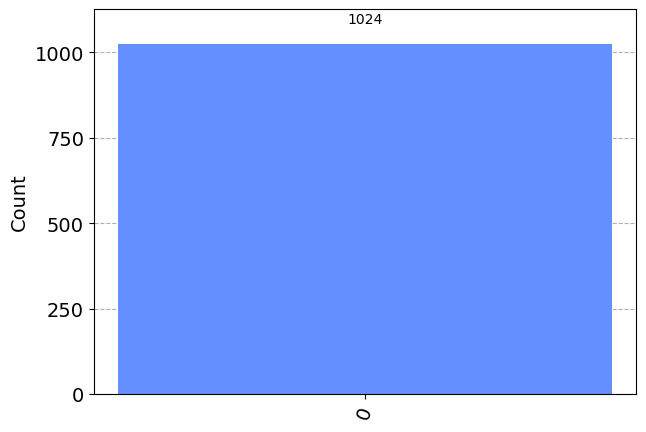

In [15]:
# Constant Oracle Circuit
constant_circuit = deutsch_algorithm(constant_oracle())
print("Constant Oracle Circuit:")
print(constant_circuit)

simulator = Aer.get_backend('qasm_simulator')
results_constant = execute(constant_circuit, simulator).result()
counts_constant = results_constant.get_counts(constant_circuit)
plot_histogram(counts_constant)

Set the input qubit to |0> and the output qubit to |1>
          
q_0: ─────
     ┌───┐
q_1: ┤ X ├
     └───┘
c: 1/═════
          
Apply a Hadamard gate to both qubits
           ░ ┌───┐
q_0: ──────░─┤ H ├
     ┌───┐ ░ ├───┤
q_1: ┤ X ├─░─┤ H ├
     └───┘ ░ └───┘
c: 1/═════════════
                  
Apply the oracle
           ░ ┌───┐ ░ ┌──────────────┐
q_0: ──────░─┤ H ├─░─┤0             ├
     ┌───┐ ░ ├───┤ ░ │  circuit-178 │
q_1: ┤ X ├─░─┤ H ├─░─┤1             ├
     └───┘ ░ └───┘ ░ └──────────────┘
c: 1/════════════════════════════════
                                     
Apply another Hadamard gate to the input qubit
           ░ ┌───┐ ░ ┌──────────────┐ ░ ┌───┐
q_0: ──────░─┤ H ├─░─┤0             ├─░─┤ H ├
     ┌───┐ ░ ├───┤ ░ │  circuit-178 │ ░ └───┘
q_1: ┤ X ├─░─┤ H ├─░─┤1             ├─░──────
     └───┘ ░ └───┘ ░ └──────────────┘ ░      
c: 1/════════════════════════════════════════
                                             
Balanced Oracle Circuit:
           ░ ┌───┐ ░ 

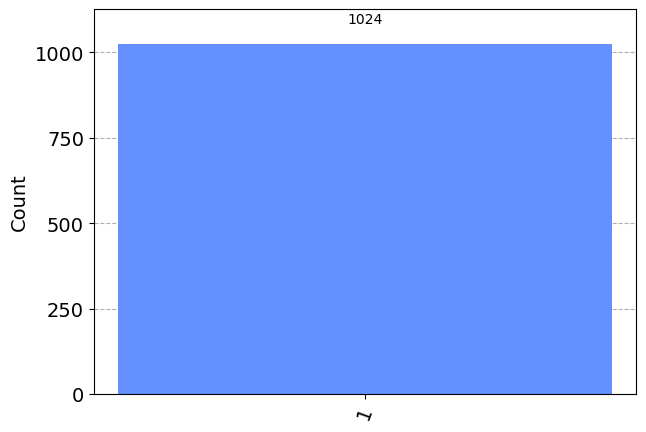

In [16]:
# Balanced Oracle Circuit
balanced_circuit = deutsch_algorithm(balanced_oracle())
print("Balanced Oracle Circuit:")
print(balanced_circuit)# Balanced Oracle Circuit

simulator = Aer.get_backend('qasm_simulator')
results_balanced = execute(balanced_circuit, simulator).result()
counts_balanced = results_balanced.get_counts(balanced_circuit)
plot_histogram(counts_balanced)

<h4>What Does the Output Mean?</h4>

Result 0: If you get 0, it indicates that the function implemented by the oracle is constant. This means the function gives the same output (either all 0s or all 1s) for all inputs.

Result 1: If you get 1, it suggests that the function is balanced. A balanced function outputs 0 for half the inputs and 1 for the other half.

The aspect of Deutsch's Algorithm is that it requires only one query to the oracle to determine whether the function is constant or balanced. This is a significant improvement over classical algorithms, which would require two queries (one for each possible input) to determine the nature of the function.

<h3>Efficacy of the Algorithm</h3>

Simulating both the constant and balanced oracle circuits using Qiskit's 'qasm_simulator', which stands for Quantum Assembly Language simulator. It imitates the operation of a quantum computer, allowing to measure qubits and obtain classical bits as output.

The simulation process is similar to running the algorithm on an actual quantum computer. But, using a classical computer to simulate the quantum behaviour. Executing the quantum circuit multiple times (known as shots) to get a statistical understanding of the results. This is necessary because quantum mechanics involves probabilities, and want to make sure the results are reliable.


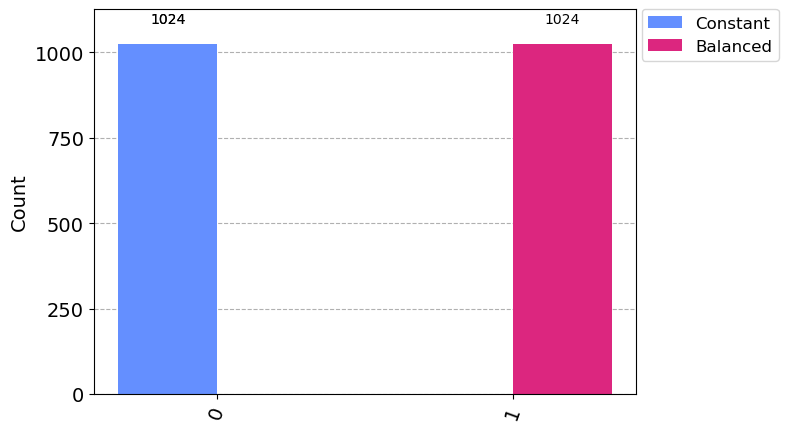

In [17]:
simulator = Aer.get_backend('qasm_simulator')

# Simulate the constant oracle circuit
result_constant = execute(constant_circuit, simulator, shots=1024).result()
counts_constant = result_constant.get_counts(constant_circuit)

# Simulate the balanced oracle circuit
result_balanced = execute(balanced_circuit, simulator, shots=1024).result()
counts_balanced = result_balanced.get_counts(balanced_circuit)

plot_histogram([counts_constant, counts_balanced], legend=['Constant', 'Balanced'])

The histograms which were generated from constant and balanced oracle circuits visually represent the algorithms performance. The predictable outcomes show the efficacy of the algorithm.

1. <b>Constant Oracle
    - It consistently yields the same result if quantum state prior to measurement. The lack of variance shows and aligns with the theoretical expectation for a constant function.
    
2. <b>Balanced Oracle
    - The Balanced oracle is very different from the constant oracle. Instead of all the results being the same, they all switch to the other possibility.
    
This tells us that the algorithm can tell the difference between the two kinds of oracles constant and balanced really well. The fact that this result is consistent every time the algorithm is ran (every shot) makes it reliable and useful.

<h3>Running Code on IBM Quantum systems - ibm_brisbane </h3>

Note: To Run this you will need to use your own token, This can be created by making an account with IBM. <a href="https://docs.quantum.ibm.com/start/setup-channel#ibm-quantum-platform">Create IBM Account</a>

IBMQ.save_account('Insert your token here')

In [ ]:
from qiskit import QuantumCircuit, Aer, execute, IBMQ
from qiskit.visualization import plot_histogram
from qiskit.circuit import Gate
from qiskit.tools.monitor import job_monitor

IBMQ.save_account('e8df44398fa3ee8d2d2a1cf702ce204245dc57fdfb68c998f990b54bb071e529d17d8805f8b7d096b595032c402a0f8d1c3e9d5745908f66e1b620e1439fba6e', overwrite=True)
IBMQ.load_account()

# Define constant oracle function
def constant_oracle():
    qc = QuantumCircuit(2)
    # Since the function is constant, no operation is performed on the qubit.
    return qc

# Define balanced oracle function
def balanced_oracle():
    qc = QuantumCircuit(2)
    # CNOT gate flips the second qubit if the first qubit is |1>
    qc.cx(0, 1)
    return qc

def deutsch_algorithm(oracle):
    qc = QuantumCircuit(2, 1)
    qc.x(1)
    qc.barrier()
    qc.h(0)
    qc.h(1)
    qc.barrier()
    qc.append(oracle, [0, 1])
    qc.barrier()
    qc.h(0)
    qc.barrier()
    qc.measure(0, 0)
    return qc

constant_circuit = deutsch_algorithm(constant_oracle())
balanced_circuit = deutsch_algorithm(balanced_oracle())


provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibm_brisbane')  

job_constant = execute(constant_circuit, backend, shots=1024)
job_balanced = execute(balanced_circuit, backend, shots=1024)

job_monitor(job_constant)
job_monitor(job_balanced)

result_constant = job_constant.result()
counts_constant = result_constant.get_counts(constant_circuit)
result_balanced = job_balanced.result()
counts_balanced = result_balanced.get_counts(balanced_circuit)

plot_histogram([counts_constant, counts_balanced], legend=['Constant', 'Balanced'])


ibmqfactory.load_account:WARNING:2023-12-18 17:28:38,467: Credentials are already in use. The existing account in the session will be replaced.


Job Status: job is queued (None)

<h3>Below the two jobs got executed:</h3>

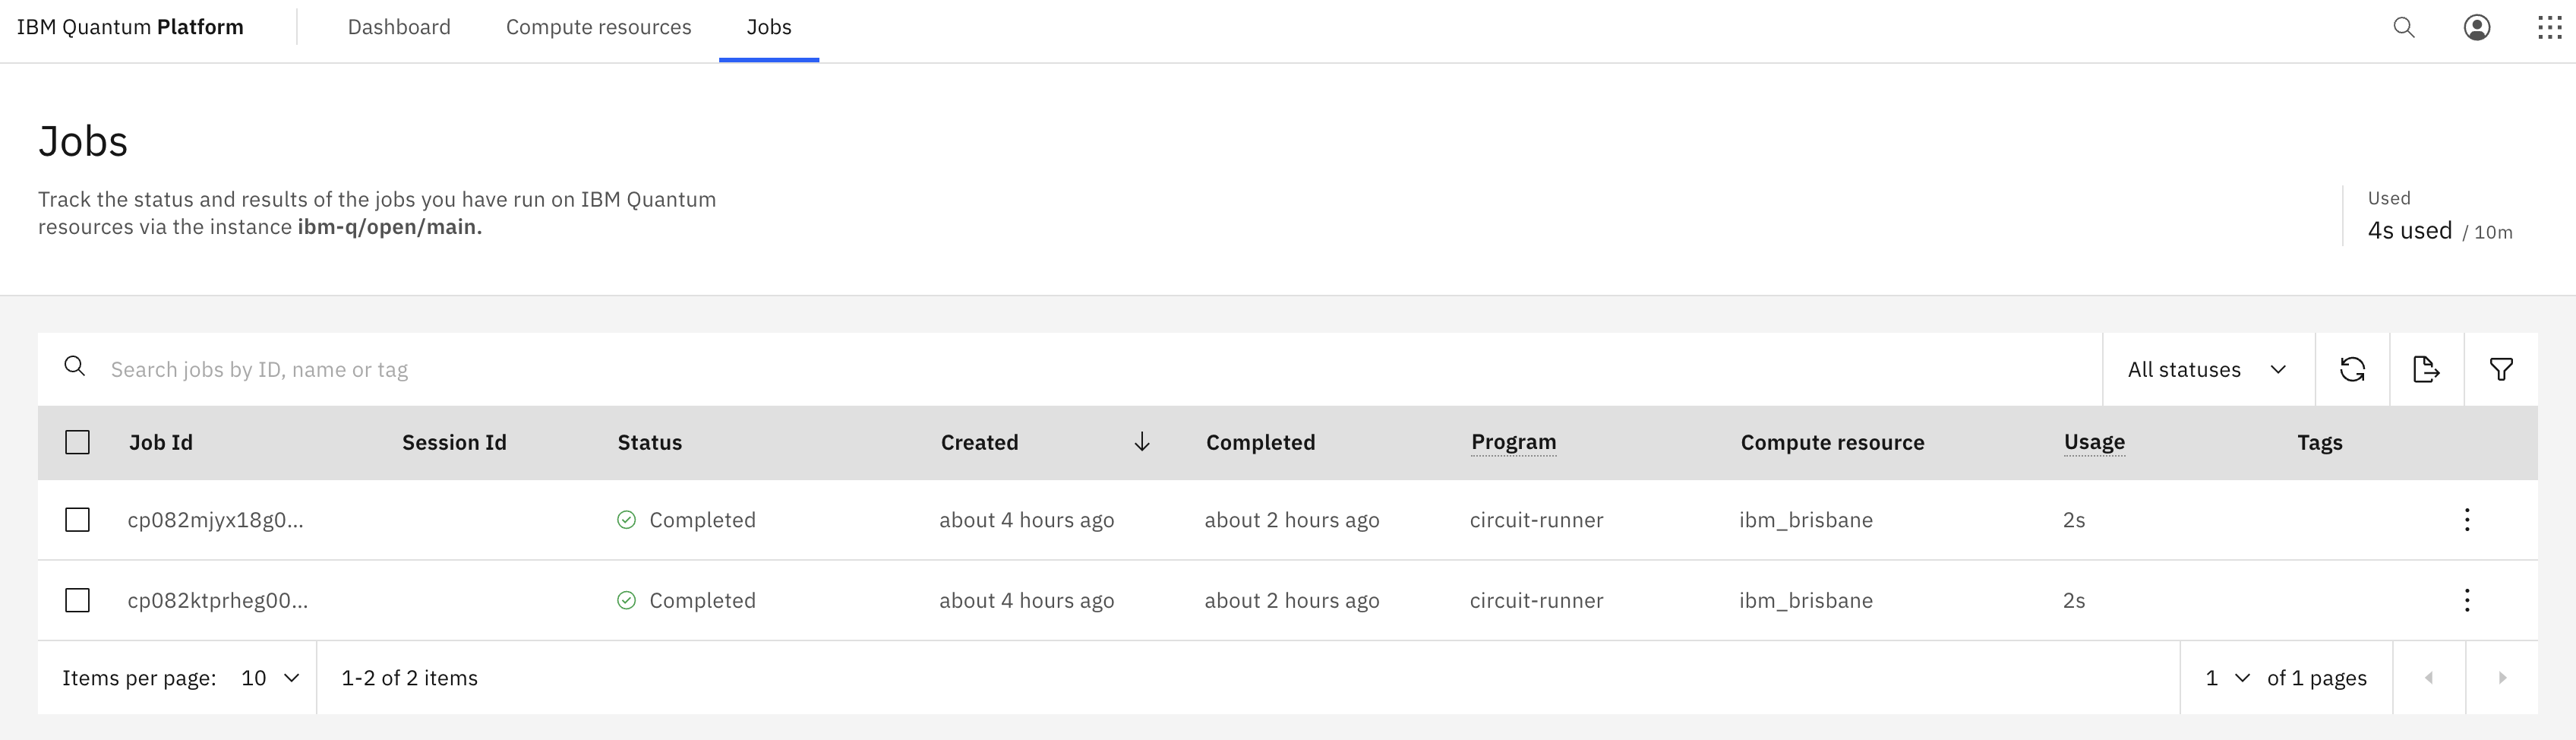
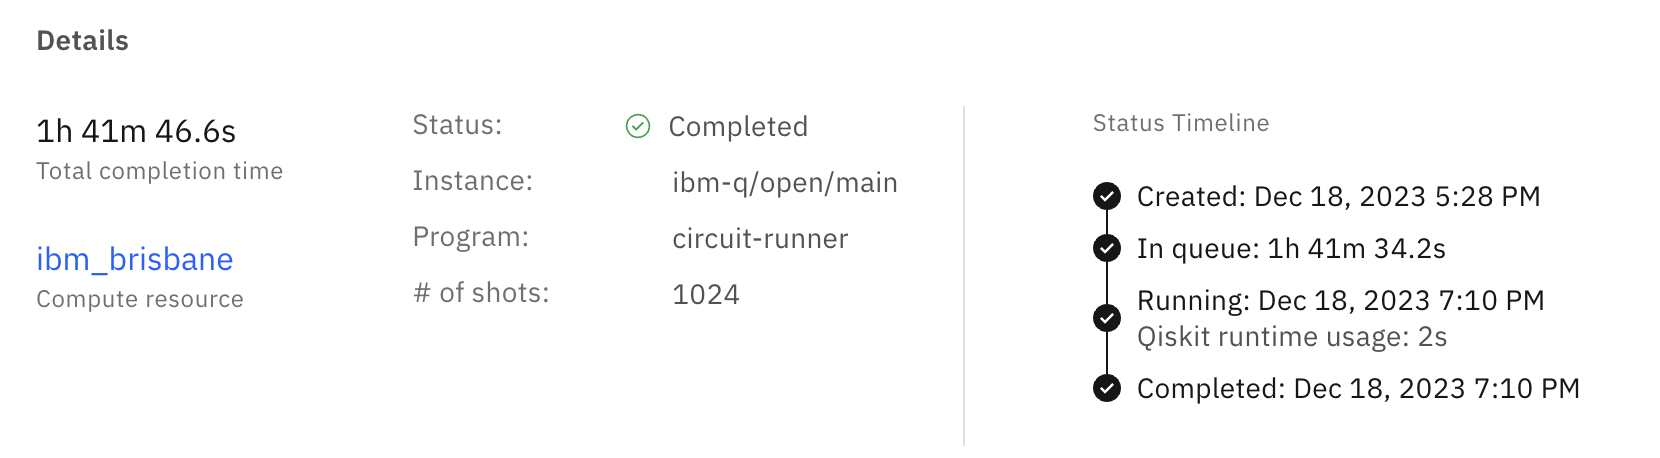

In [24]:
# Data from IBQ Jobs

Constant_Oracle = {
    "backend_name": "ibm_brisbane",
    "backend_version": "1.1.15",
    "date": "2023-12-18T19:10:31.208619+00:00",
    "job_id": "circuit-runner_cm09i751urauqq0fo370_668c_0",
    "status": "done",
    "success": True,
    "results": [{
        "shots": 1024,
        "success": True,
        "data": {
            "counts": {"0x1": 82, "0x0": 942}
        },
        "meas_level": 2,
        "n_qubits": 127,
        "name": "circuit-270",
        "global_phase": 2.356194490192345
    }],
    "time_taken": 1.5850911479999998
}
    
Balanced_Oracle = {
    "backend_name": "ibm_brisbane",
    "backend_version": "1.1.15",
    "date": "2023-12-18T19:10:36.496133+00:00",
    "job_id": "circuit-runner_cm09i7e9qgrpo82a2qs0_5647_0",
    "status": "done",
    "success": True,
    "results": [{
        "shots": 1024,
        "success": True,
        "data": {
            "counts": {"0x1": 991, "0x0": 33}
        },
        "meas_level": 2,
        "n_qubits": 127,
        "name": "circuit-274",
        "global_phase": 3.141592653589793
    }],
    "time_taken": 1.293202856
}


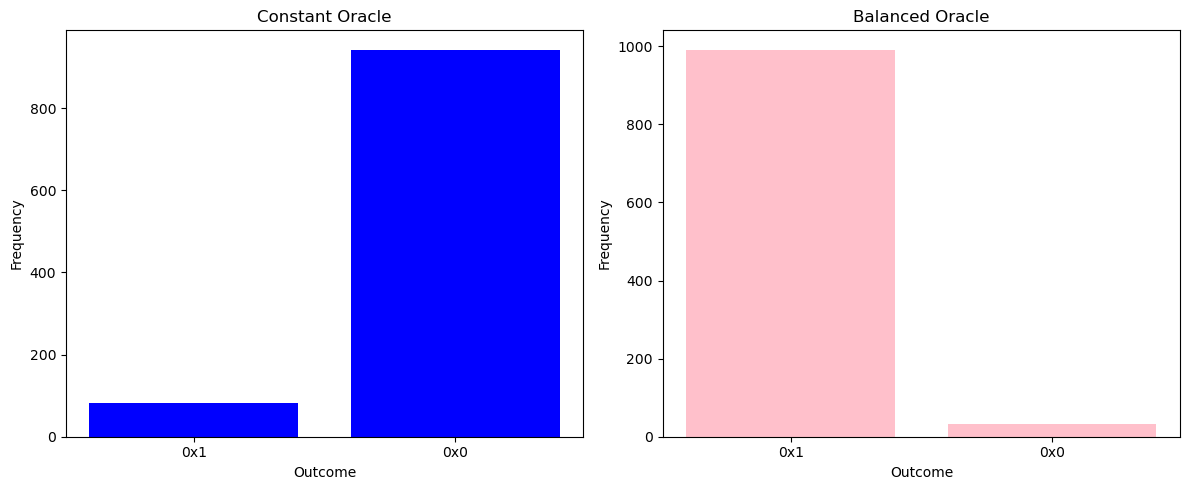

In [29]:
import matplotlib.pyplot as plt

constant_oracle_counts = Constant_Oracle['results'][0]['data']['counts']
balanced_oracle_counts = Balanced_Oracle['results'][0]['data']['counts']

labels_constant = constant_oracle_counts.keys()
frequencies_constant = constant_oracle_counts.values()

labels_balanced = balanced_oracle_counts.keys()
frequencies_balanced = balanced_oracle_counts.values()

# Plotting the histograms
fig, axs = plt.subplots(1, 2, figsize=(12, 5))

# Histogram for Constant Oracle
axs[0].bar(labels_constant, frequencies_constant, color='blue')
axs[0].set_title('Constant Oracle')
axs[0].set_xlabel('Outcome')
axs[0].set_ylabel('Frequency')

# Histogram for Balanced Oracle
axs[1].bar(labels_balanced, frequencies_balanced, color='pink')
axs[1].set_title('Balanced Oracle')
axs[1].set_xlabel('Outcome')
axs[1].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


<h4>Outcome:</h4>

Just like the QASM_Simulater the data the histograms which were generated from constant and balanced oracle circuits visually represent the algorithms performance as noted before.This predictable outcome again shows the efficacy of the algorithm.

<h1>References:</h1>

1. Quantum 101: https://quantumzeitgeist.com/quantum-computing-101/
2. Wikipedia: https://en.wikipedia.org/wiki/Deutsch%E2%80%93Jozsa_algorithm
3. IBM Quantum: https://learning.quantum.ibm.com/course/fundamentals-of-quantum-algorithms/quantum-query-algorithms
4. Deutsch-Jozsa, or How to Evaluate a Balanced Function: https://fullstackquantumcomputation.tech/blog/deutsch-algorithm/
5. Hadmard Gate: https://www.sciencedirect.com/topics/mathematics/hadamard-gate
6. CNOT Gate: https://www.quantum-inspire.com/kbase/cnot/
7. How to Run on IBM Backend: https://docs.quantum.ibm.com/run/get-backend-information

<h2>Video Learning:</h2>

1. Deutsch's Algorithm: An Introduction to Quantum Computing Oracles: https://www.youtube.com/watch?v=7MdEHsRZxvo&ab_channel=QuantumSoar
2. Quantum Computers Explained – Limits of Human Technology: https://www.youtube.com/watch?v=JhHMJCUmq28&ab_channel=Kurzgesagt%E2%80%93InaNutshell
3. IQIS Lecture 1.6 — Deterministic, probabilistic, and quantum computation: https://www.youtube.com/watch?v=v6-tQj--yoI&ab_channel=ArturEkert